<a href="https://colab.research.google.com/github/uyenbhku/handwritten_digits/blob/main/ModernMNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Information

**Team:** NSFW 

**Members:**

|No.|Member|Student ID|
|:-:|:-:|:-:|
|1|[Nguyen Trong An](https://github.com/chongan0224)|21520548|
|2|[Bui Huynh Kim Uyen](https://github.com/uyenbhku)|21521659|
|3|[Nguyen Nguyen Giap](https://github.com/Paignn)|21522025|
|4|[Nguyen Bui Thanh Mai](https://github.com/21522320)|21522320|

**Instructor:** Msc. Pham Nguyen Truong An

## Thông tin notebook:
Notebook gồm các nội dung: các kỹ thuật tiền xử lý ảnh, thí nghiệm chọn model và kết luận.

Các models được thử nghiệm là:

|Statistic-based models|Tree-based models|Distance-based model|
|:-:|:-:|:-:|
|Logistic Regression|Random Forest| SVM |
|Gaussian Naive Bayes|XGBoost| kNN |
|Multinomial Naive Bayes|Gradient Boosting||

Kết quả được tổng hợp dưới phần kết luận ở dưới cùng của notebook [tại đây](https://colab.research.google.com/drive/1F1dlC9XDQH8M5Ud4pFgZMkcDxfKlZvM3#scrollTo=Z02fs-314W3x&line=10&uniqifier=1).

Mục tiêu của bài toán này là để **tạo model có khả năng nhận diện chữ viết tay**.


## Tóm tắt các bước thực hiện:
1. Thu thập data (bước này làm bằng cơm, đánh giá bằng mắt, vui lòng đừng hỏi bằng chứng 😒) \
    1.1. Tải tất cả dataset của các nhóm từ GitHub \
    1.2. Lọc bỏ những ảnh vi phạm: 
    + Số phải ở gần giữa ảnh (quá lệch trái/phải/trên/dưới không được tính)
    + Diện tích số trên ảnh khoảng 50% diện tích ảnh, gần sát viền giấy
    + Những ảnh nghi ngờ không phải ảnh nguyên bản, bị crop/resize thủ công \
2. Tiền xử lý ảnh => data \
    2.1. Khử noise (được thêm sau này) \
    2.2. Resize \
    2.3. Flatten ảnh \
    2.4. Chia làm 3 bộ train/dev/test với ratio 66:22:12 với randomly splitting
3. Thí nghiệm chọn model \
    3.1. Sử dụng Grid Search và Cross validation để tìm bộ tham số tốt nhất \
    3.2. Train với tập train và bộ tham số vừa tìm được \
    3.3. Đánh giá model theo accuracy \
3. Kết luận/Nhận xét

# Dataset information

- Dataset được thu thập và lọc ra từ ảnh của tất cả các nhóm đã nộp dataset. Các ảnh bị lọc ra là các ảnh chụp không sát viền (diện tích chiếm tầm 50% ảnh), resize ảnh còn quá bé (vì không phù hợp với các thiết bị ngày nay)
- Số lượng: 821 ảnh 

# Create Model

In [ ]:
# import libraries

import os  # read files
import cv2  # image processing
import numpy as np  
import matplotlib.pyplot as plt   # visualize image 

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Load dataset


Link Dataset: https://drive.google.com/drive/folders/1GydgJLiqibxD7LSJCbxSDZpOF8Jf3H5r?usp=drive_link

Các bước thực hiện: 
1. Tải 
    - Cách 1 (*đã bỏ*): **chỉ hoạt động đối với những người trong team**: tạo shortcut folder CS114 tới My Drive, mount với notebook này. 
    - Cách 2: **hoạt động với tất cả mọi người**: tải file nén dataset từ google drive và unzip
2. Chuyển tới folder chứa dataset
3. Đọc dataset 

### Download:

Link file zip: https://drive.google.com/file/d/13dm7T96jcj2Ku0-q_JpVT5dg0dc0MrGh/view?usp=drive_link

In [ ]:
!gdown 13dm7T96jcj2Ku0-q_JpVT5dg0dc0MrGh

Downloading...
From: https://drive.google.com/uc?id=13dm7T96jcj2Ku0-q_JpVT5dg0dc0MrGh
To: /content/dataset.zip
100% 433M/433M [00:12<00:00, 34.3MB/s]


In [ ]:
!unzip dataset.zip

In [ ]:
%cd dataset/

/content/dataset


### Read dataset 

Vì mục tiêu bài toán là **nhận diện chữ viết tay**, tức là các thông tin về pattern, structures hơn là màu sắc, do đó thông tin về màu sắc là **không liên quan**. Hơn nữa việc đọc ảnh Grayscale cũng sẽ giảm được số chiều của thông tin.

Do đó, notebook này sẽ chỉ sử dụng ảnh xám.

In [ ]:
# read all directories' name 
dir_names = list(np.sort(os.listdir('.')))
dir_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
images = dict()
labels = dict()

In [ ]:
# read all images in the dataset
for dir_name in dir_names:
    # list all image names in a directory
    filenames = list(np.sort(os.listdir('./' + dir_name)))
    # init array
    images[dir_name] = []
    labels[dir_name] = []
    # add images  
    for filename in filenames:
        # read image
        image = cv2.imread('./' + dir_name + '/' + filename, cv2.IMREAD_GRAYSCALE)
        images[dir_name].append(image)
        labels[dir_name].append(int(dir_name))

In [ ]:
# check number of samples 
for label in labels:
    print(f"{label} len = {(len(labels[label]))}")

0 len = 88
1 len = 87
2 len = 92
3 len = 86
4 len = 87
5 len = 75
6 len = 77
7 len = 74
8 len = 77
9 len = 78


In [ ]:
def show_img(img):
    plt.imshow(img, cmap='gray')

## Preprocess

### Resize

Vì mỗi ảnh sẽ có một ratio và size khác nhau, nên chúng ta cần resize về cùng một ratio và size. Ở đây, để đơn giản, nhóm sẽ sử dụng ratio 1:1. Về size, vì khả năng tính toán của nhóm có giới hạn, nên nếu sử dụng size quá lớn thì không đủ khả năng train, do đó nhóm sẽ resize về 12x12, 28x28 và 32x32. 


Theo như đã thử cũng như tham khảo ở [đây](https://learnopencv.com/image-resizing-with-opencv/), reduce size theo phương pháp nội suy INTER_AREA giữ được nhiều thông tin hơn so với các phương pháp nội suy khác

#### Thử phương pháp nội suy

In [ ]:
images['9'][15].shape

(1280, 961)

In [ ]:
image = images['9'][15]

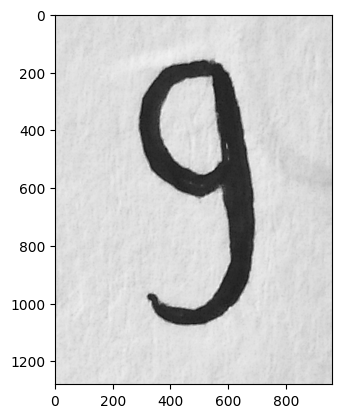

In [ ]:
show_img(image)

In [ ]:
img = cv2.resize(image, (12,12), interpolation= cv2.INTER_AREA)

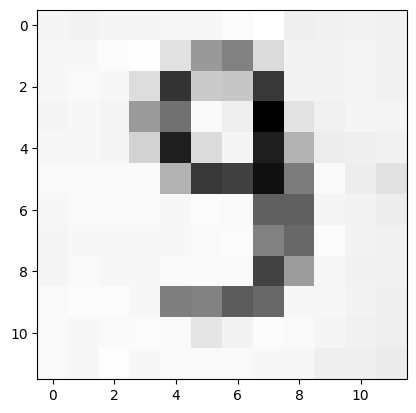

In [ ]:
show_img(img)

In [ ]:
img = cv2.resize(image, (12, 12), interpolation= cv2.INTER_LINEAR)

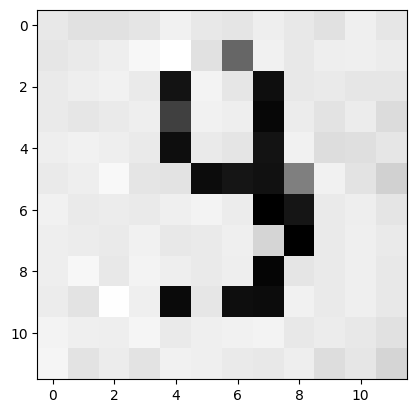

In [ ]:
show_img(img)

In [ ]:
img = cv2.resize(image, (12, 12), interpolation= cv2.INTER_NEAREST)

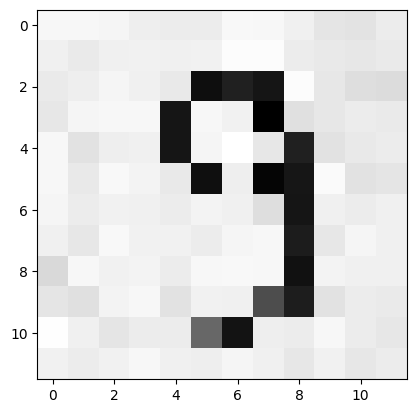

In [ ]:
show_img(img)

In [ ]:
img = cv2.resize(image, (12, 12), interpolation= cv2.INTER_CUBIC)

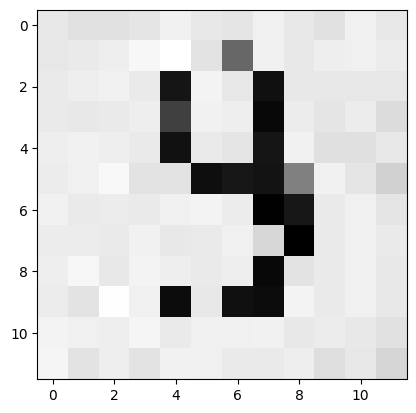

In [ ]:
show_img(img)

#### Resize function

In [ ]:
def resize(img, size):
    return cv2.resize(image, (size, size), interpolation= cv2.INTER_AREA)

### Reduce Noise by Otsu's method

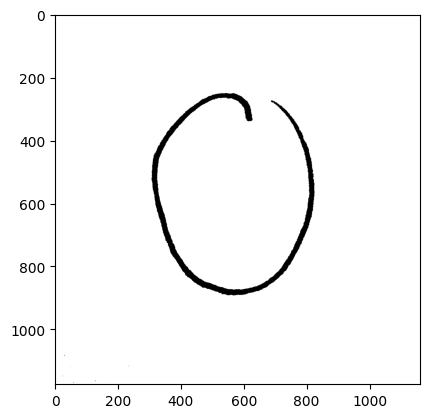

In [ ]:
_, image_result = cv2.threshold(
    cv2.GaussianBlur(images['0'][0], (5, 5), 0), 0, 255, cv2.THRESH_OTSU,
)
show_img(image_result)

In [ ]:
def reduce_noise(img):
    _, image_result = cv2.threshold(
        cv2.GaussianBlur(img, (5, 5), 0), 0, 255, cv2.THRESH_OTSU,
        )
    return image_result

### Preprocess

In [ ]:
processed_images = dict()
for key in images.keys(): 
    processed_images[key] = []
    for image in images[key]:
        image = reduce_noise(image) # comment this line of code to not turn on reducing noise
        processed_images[key].append(resize(image, 32))

### Convert to numpy

Để tính toán cho nhanh 

In [ ]:
X = np.concatenate([processed_images[x] for x in processed_images])

In [ ]:
X.shape

(821, 32, 32)

In [ ]:
y = np.concatenate([labels[x] for x in labels])

In [ ]:
y.shape

(821,)

In [ ]:
# read all images in the dataset
#for dir_name in dir_names:
    # list all image names in a directory
 #   filenames = list(np.sort(os.listdir('./' + dir_name)))
    # add images  
  #  for filename in filenames:
        # read image
   #     image = cv2.imread('./' + dir_name + '/' + filename, cv2.IMREAD_GRAYSCALE)
    #    if (image.shape[0] < 500 or image.shape[1] < 500):
     #       print(f'label: {dir_name} , i = {filename}')

### Flatten 

Không thể đem dữ liệu 2D vào model train liền được vì các model máy học truyền thống không train được dữ liệu 2D. Do đó, cần phải duỗi ảnh `nxn` sang một vector có độ dài `n^2`, với một điểm trong vector tương ứng 1 pixel.

In [ ]:
def flatten(dataset):
    return dataset.reshape((dataset.shape[0], -1))

In [ ]:
flattened_X = flatten(X)

In [ ]:
flattened_X.shape

(821, 1024)

### Shuffle

In [ ]:
from sklearn.utils import shuffle
flattened_X, y = shuffle(flattened_X, y, random_state=7)

### Split

Sử dụng randomly splitting, split thành 3 subsets với tỉ lệ train/dev/test: 66:22:12

In [ ]:
# Split data into 66% train and 34% dev/test subsets
X_traindev, X_test, y_traindev, y_test = train_test_split(
    flattened_X, y, test_size=0.12, shuffle=False
)

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(
    X_traindev, y_traindev, test_size=0.25, shuffle=False
)

## Experimenting

Learning curve: giúp giải quyết vấn đề underfitting và overfitting

Validation curve: giúp chọn được hyperparameter tốt nhất cho model

Sử dụng GridSearch để tìm được bộ tham số tốt nhất cho model

### Model name: SVM 12x12

+ Resize về 12x12:
    1. kernel='rbf', C=10000, gamma=1e-06 => accuracy : 0.51

+ Resize 12x12 + Otsu's method:
    1. kernel='rbf', C=10000, gamma=1e-06 => accuracy : 0.6
    2. 'C': 100.0, 'gamma': 1e-06, 'kernel': 'rbf' => accuracy : 0.61


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': np.logspace(-2, 10, 13),  
              'gamma': np.logspace(-9, 3, 13), 
              'kernel': ['rbf']}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=cv) 

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 169 candidates, totalling 845 fits
The best parameters are {'C': 100.0, 'gamma': 1e-06, 'kernel': 'rbf'} with a score of 0.61


In [ ]:
clf_svmrbf = SVC(C=100.0, gamma=1e-06, kernel='rbf')

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(
    X_traindev, y_traindev, test_size=0.25, shuffle=False
)

In [ ]:
clf_svmrbf.fit(X_train, y_train)

SVC(C=100.0, gamma=1e-06)

#### Evaluation

In [ ]:
y_preds = clf_svmrbf.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_svmrbf}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
)  

Classification report for classifier SVC(C=100.0, gamma=1e-06):
              precision    recall  f1-score   support

           0       0.53      0.91      0.67        11
           1       0.71      0.56      0.63         9
           2       0.80      0.57      0.67        14
           3       0.58      0.64      0.61        11
           4       0.60      0.60      0.60        10
           5       0.42      0.50      0.45        10
           6       0.83      0.45      0.59        11
           7       0.67      0.86      0.75         7
           8       0.60      0.60      0.60         5
           9       0.56      0.45      0.50        11

    accuracy                           0.61        99
   macro avg       0.63      0.61      0.61        99
weighted avg       0.64      0.61      0.60        99




Confusion matrix:
[[10  0  0  0  0  0  0  0  0  1]
 [ 0  5  0  0  0  1  0  0  1  2]
 [ 2  0  8  0  0  2  1  0  0  1]
 [ 1  0  1  7  1  0  0  1  0  0]
 [ 1  1  1  1  6  0  0  0  0  0]
 [ 1  1  0  2  0  5  0  0  1  0]
 [ 3  0  0  0  2  1  5  0  0  0]
 [ 0  0  0  0  0  1  0  6  0  0]
 [ 0  0  0  2  0  0  0  0  3  0]
 [ 1  0  0  0  1  2  0  2  0  5]]


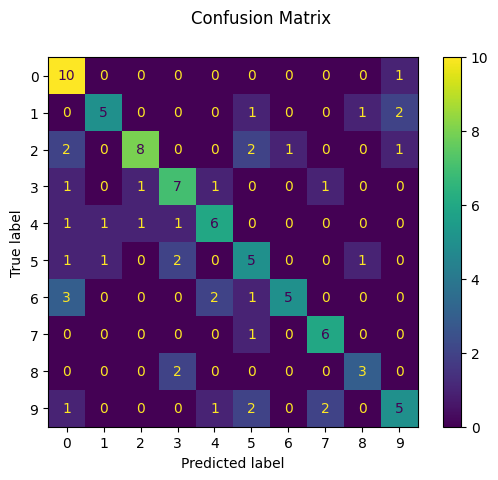

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: SVM 28x28

Resize về 28x28: 0.43 \
Thêm reduce noise: 
- kernel='rbf', C=100.0, gamma=1e-07 => 0.58


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': np.logspace(-4, 2, 7),  
              'gamma': np.logspace(-11, -5, 7), 
              'kernel': ['rbf', 'linear']}

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=cv) 

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV 1/3] END .C=0.0001, gamma=1e-11, kernel=rbf;, score=0.227 total time=   0.2s
[CV 2/3] END .C=0.0001, gamma=1e-11, kernel=rbf;, score=0.177 total time=   0.2s
[CV 3/3] END .C=0.0001, gamma=1e-11, kernel=rbf;, score=0.177 total time=   0.3s
[CV 1/3] END C=0.0001, gamma=1e-11, kernel=linear;, score=0.508 total time=   0.3s
[CV 2/3] END C=0.0001, gamma=1e-11, kernel=linear;, score=0.475 total time=   0.2s
[CV 3/3] END C=0.0001, gamma=1e-11, kernel=linear;, score=0.525 total time=   0.1s
[CV 1/3] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.227 total time=   0.2s
[CV 2/3] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.177 total time=   0.2s
[CV 3/3] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.177 total time=   0.2s
[CV 1/3] END C=0.0001, gamma=1e-10, kernel=linear;, score=0.508 total time=   0.1s
[CV 2/3] END C=0.0001, gamma=1e-10, kernel=linear;, score=0.475 total time=   0.1s
[CV 3/3] END C=0.0001, gamma=1e-10, k

In [ ]:
clf_svmrbf = SVC(kernel='rbf', C=100.0, gamma=1e-07)

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(
    X_traindev, y_traindev, test_size=0.25, shuffle=False
)

In [ ]:
clf_svmrbf.fit(X_train, y_train)

SVC(C=100.0, gamma=1e-07)

#### Evaluation

In [ ]:
y_preds = clf_svmrbf.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_svmrbf}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
)  

Classification report for classifier SVC(C=100.0, gamma=1e-07):
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.71      0.56      0.63         9
           2       0.73      0.57      0.64        14
           3       0.43      0.55      0.48        11
           4       0.56      0.50      0.53        10
           5       0.75      0.60      0.67        10
           6       0.50      0.45      0.48        11
           7       0.44      0.57      0.50         7
           8       0.33      0.60      0.43         5
           9       0.60      0.55      0.57        11

    accuracy                           0.58        99
   macro avg       0.58      0.58      0.57        99
weighted avg       0.60      0.58      0.58        99




Confusion matrix:
[[9 0 0 1 0 0 0 0 1 0]
 [0 5 1 1 0 0 0 1 0 1]
 [1 0 8 1 0 0 2 0 1 1]
 [0 0 0 6 1 0 1 2 1 0]
 [0 1 1 0 5 0 1 0 1 1]
 [0 0 1 1 0 6 1 0 0 1]
 [2 0 0 1 1 1 5 0 1 0]
 [0 1 0 0 0 1 0 4 1 0]
 [0 0 0 2 0 0 0 0 3 0]
 [0 0 0 1 2 0 0 2 0 6]]


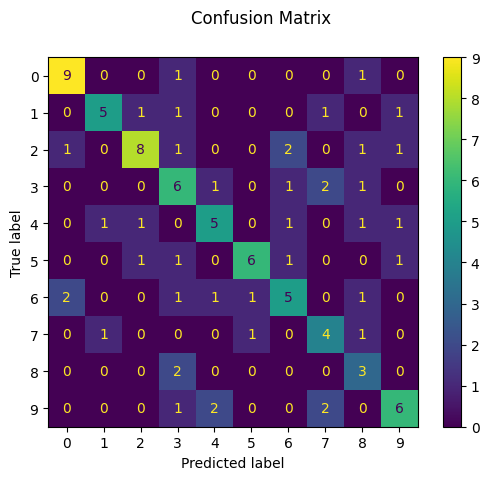

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: SVM 32x32

Resize về 32x32: 
C=0.01, gamma=1e-09, kernel='linear' => 0.19 \
Thêm reduce noise:
- C=0.01, gamma=1e-09, kernel='linear' => 0.51
- C=100, gamma= 1e-07, kernel='rbf' => 0.6

In [ ]:
param_grid = {'C': np.logspace(-4, 2, 7),  
              'gamma': np.logspace(-11, -5, 7), 
              'kernel': ['rbf', 'linear']}

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=cv) 

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV 1/3] END .C=0.0001, gamma=1e-11, kernel=rbf;, score=0.110 total time=   0.4s
[CV 2/3] END .C=0.0001, gamma=1e-11, kernel=rbf;, score=0.116 total time=   0.3s
[CV 3/3] END .C=0.0001, gamma=1e-11, kernel=rbf;, score=0.110 total time=   0.4s
[CV 1/3] END C=0.0001, gamma=1e-11, kernel=linear;, score=0.482 total time=   0.4s
[CV 2/3] END C=0.0001, gamma=1e-11, kernel=linear;, score=0.488 total time=   0.4s
[CV 3/3] END C=0.0001, gamma=1e-11, kernel=linear;, score=0.518 total time=   0.3s
[CV 1/3] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.110 total time=   0.3s
[CV 2/3] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.116 total time=   0.9s
[CV 3/3] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.110 total time=   0.3s
[CV 1/3] END C=0.0001, gamma=1e-10, kernel=linear;, score=0.482 total time=   0.2s
[CV 2/3] END C=0.0001, gamma=1e-10, kernel=linear;, score=0.488 total time=   0.2s
[CV 3/3] END C=0.0001, gamma=1e-10, k

In [ ]:
clf_svmrbf = SVC(C=100, gamma= 1e-07, kernel='rbf')

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(
    X_traindev, y_traindev, test_size=0.25, shuffle=False
)

In [ ]:
clf_svmrbf.fit(X_train, y_train)

SVC(C=100, gamma=1e-07)

#### Evaluation

In [ ]:
y_preds = clf_svmrbf.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_svmrbf}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
)  

Confusion matrix:
[[9 0 0 0 0 0 1 0 0 1]
 [0 5 1 1 0 0 0 1 0 1]
 [1 0 9 0 0 0 2 0 1 1]
 [1 1 0 4 1 0 0 1 2 1]
 [1 2 1 0 6 0 0 0 0 0]
 [0 1 1 1 0 5 1 0 1 0]
 [3 0 0 0 1 0 7 0 0 0]
 [0 0 0 0 1 1 0 5 0 0]
 [0 0 0 3 0 0 0 0 2 0]
 [0 0 0 1 0 1 0 1 1 7]]


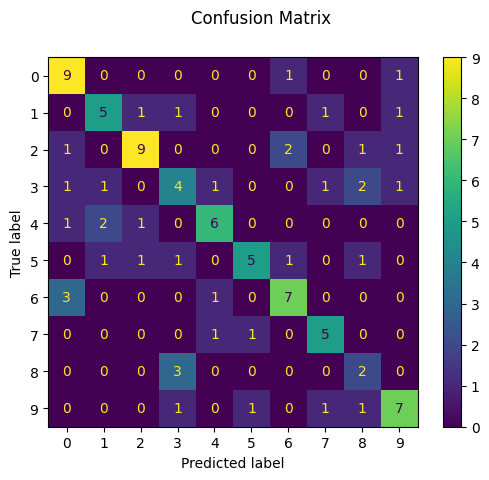

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
np.unique(y_dev, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([19, 17, 22, 13, 16, 15, 22, 18, 22, 17]))

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([58, 61, 56, 62, 61, 50, 44, 49, 50, 50]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([11,  9, 14, 11, 10, 10, 11,  7,  5, 11]))

### Model name: Random Forest 12x12

+ Resize 12x12
    1. criterion='entropy', max_depth=9, random_state=7 => accuracy : 0.42
    2. criterion='entropy', max_depth=13, random_state=7, max_features=None, max_leaf_nodes=None => accuracy : 0.56
+ Resize 12x12 + Otsu method 
    1. criterion='entropy', max_depth=13, random_state=7, max_features=None, max_leaf_nodes=None => accuracy : 0.64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'max_depth': np.arange(3, 16, 2),  
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features': ["sqrt", "log2", None],
              'max_leaf_nodes': [None, 80, 160]
              }

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

grid = GridSearchCV(RandomForestClassifier(random_state=7), param_grid, refit=True, verbose=1, cv=cv) 

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 189 candidates, totalling 945 fits
The best parameters are {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'max_leaf_nodes': 160} with a score of 0.69


In [ ]:
clf_rf = RandomForestClassifier(criterion='entropy', max_depth=15, random_state=7, max_features='log2', max_leaf_nodes=160)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       max_leaf_nodes=160, random_state=7)

#### Evaluation

In [ ]:
y_preds = clf_rf.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_rf}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
)  

Classification report for classifier RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       max_leaf_nodes=160, random_state=7):
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       0.46      0.67      0.55         9
           2       0.83      0.36      0.50        14
           3       0.53      0.73      0.62        11
           4       0.46      0.60      0.52        10
           5       0.80      0.40      0.53        10
           6       0.75      0.55      0.63        11
           7       0.86      0.86      0.86         7
           8       0.60      0.60      0.60         5
           9       0.64      0.64      0.64        11

    accuracy                           0.63        99
   macro avg       0.66      0.64      0.63        99
weighted avg       0.67      0.63      0.62        99




Confusion matrix:
[[11  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  1  0  0  0  1  0  1]
 [ 1  2  5  1  2  0  1  0  1  1]
 [ 1  1  0  8  1  0  0  0  0  0]
 [ 0  4  0  0  6  0  0  0  0  0]
 [ 0  0  0  3  1  4  1  0  0  1]
 [ 2  0  0  0  1  0  6  0  1  1]
 [ 0  0  1  0  0  0  0  6  0  0]
 [ 0  0  0  2  0  0  0  0  3  0]
 [ 1  0  0  0  2  1  0  0  0  7]]


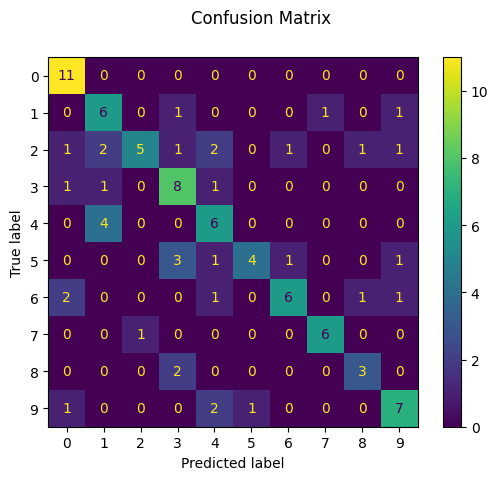

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: Random Forest 32x32

+ Resize 32x32

+ Resize 12x12 + Otsu method 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
processed_images = dict()
for key in images.keys(): 
    processed_images[key] = []
    for image in images[key]:
        #image = reduce_noise(image) # comment this line of code to not turn on reducing noise
        processed_images[key].append(resize(image, 32))

In [ ]:
param_grid = {'max_depth': np.arange(3, 16, 2),  
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features': ["sqrt", "log2", None],
              'max_leaf_nodes': [None, 80, 160]
              }

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

grid = GridSearchCV(RandomForestClassifier(random_state=7), param_grid, refit=True, verbose=1, cv=cv) 

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 189 candidates, totalling 945 fits
The best parameters are {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'max_leaf_nodes': 160} with a score of 0.69


In [ ]:
clf_rf = RandomForestClassifier(criterion='entropy', max_depth=15, random_state=7, max_features='log2', max_leaf_nodes=160)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       max_leaf_nodes=160, random_state=7)

#### Evaluation

In [ ]:
y_preds = clf_rf.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_rf}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
)  

Classification report for classifier RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       max_leaf_nodes=160, random_state=7):
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       0.46      0.67      0.55         9
           2       0.83      0.36      0.50        14
           3       0.53      0.73      0.62        11
           4       0.46      0.60      0.52        10
           5       0.80      0.40      0.53        10
           6       0.75      0.55      0.63        11
           7       0.86      0.86      0.86         7
           8       0.60      0.60      0.60         5
           9       0.64      0.64      0.64        11

    accuracy                           0.63        99
   macro avg       0.66      0.64      0.63        99
weighted avg       0.67      0.63      0.62        99




Confusion matrix:
[[11  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  1  0  0  0  1  0  1]
 [ 1  2  5  1  2  0  1  0  1  1]
 [ 1  1  0  8  1  0  0  0  0  0]
 [ 0  4  0  0  6  0  0  0  0  0]
 [ 0  0  0  3  1  4  1  0  0  1]
 [ 2  0  0  0  1  0  6  0  1  1]
 [ 0  0  1  0  0  0  0  6  0  0]
 [ 0  0  0  2  0  0  0  0  3  0]
 [ 1  0  0  0  2  1  0  0  0  7]]


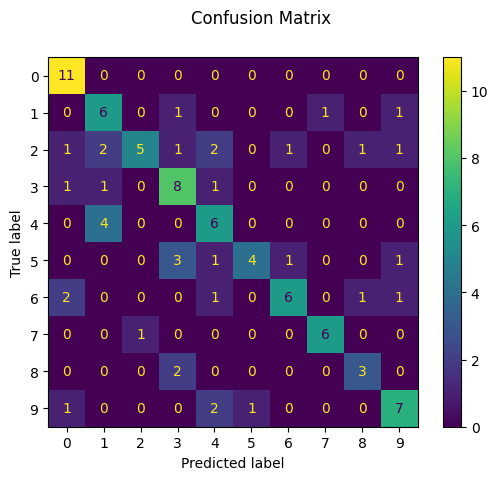

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: Logistic Regression 12x12

size 12x12

- Hyperparameter: 
1. max_iter=2154, multi_class='multinomial', penalty=None, random_state=7, solver='sag' => accuracy: 0.54
2. max_iter=1389, multi_class='multinomial', penalty=None,random_state=7, solver='sag' => accuracy: 0.55
3. max_iter=1847, solver='saga', random_state=7, multi_class='multinomial', penalty=None => accuracy: 0.55

Nếu thêm reduce noise, accuracy giảm còn 0.47 (sử dụng bộ tham số cũ) :)
- max_iter=630, multi_class='multinomial', penalty='l2', random_state=7, solver='saga' => 0.49

penalty: dùng để phạt outliers 
- L1: một số cột sẽ bị giảm coefficient, trong 1 số TH có thể bằng 0
- L2: giảm coefficient đồng đều ở tất cả các cột 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


In [ ]:
scaled_X_traindev = X_traindev / 255.
scaled_X_test = X_test / 255.

In [ ]:
param_grid = {
                'penalty' : ['l2', None],
                'solver' : ['lbfgs', 'newton-cg', 'saga'],
                'max_iter' : np.logspace(2.8, 3.5, 4).astype(int)
            }

cv = StratifiedShuffleSplit(n_splits=2, test_size=0.25, random_state=42)

grid = GridSearchCV(LogisticRegression(random_state=7, multi_class='multinomial'), param_grid, refit=True, verbose=3, cv=cv) 

grid.fit(scaled_X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END max_iter=630, penalty=l2, solver=lbfgs;, score=0.508 total time=   1.3s
[CV 2/2] END max_iter=630, penalty=l2, solver=lbfgs;, score=0.519 total time=   1.1s
[CV 1/2] END max_iter=630, penalty=l2, solver=newton-cg;, score=0.508 total time=   0.4s
[CV 2/2] END max_iter=630, penalty=l2, solver=newton-cg;, score=0.519 total time=   0.4s
[CV 1/2] END max_iter=630, penalty=l2, solver=saga;, score=0.514 total time=   3.9s
[CV 2/2] END max_iter=630, penalty=l2, solver=saga;, score=0.525 total time=   4.2s
[CV 1/2] END max_iter=630, penalty=None, solver=lbfgs;, score=0.525 total time=   0.7s
[CV 2/2] END max_iter=630, penalty=None, solver=lbfgs;, score=0.436 total time=   1.1s
[CV 1/2] END max_iter=630, penalty=None, solver=newton-cg;, score=0.508 total time=   0.7s
[CV 2/2] END max_iter=630, penalty=None, solver=newton-cg;, score=0.420 total time=   1.1s
[CV 1/2] END max_iter=630, penalty=None, solver=saga;, score=0.497 

In [ ]:
clf_lr = LogisticRegression(max_iter=630, multi_class='multinomial', penalty='l2', random_state=7, solver='saga')
clf_lr.fit(X_train / 255., y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=630, multi_class='multinomial', random_state=7,
                   solver='saga')

#### Evaluation

In [ ]:
y_preds = clf_lr.predict(scaled_X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_lr}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
)  

Confusion matrix:
[[6 0 1 2 0 0 2 0 0 0]
 [0 5 1 1 0 1 0 0 1 0]
 [2 0 5 0 2 1 0 2 1 1]
 [0 0 0 6 2 1 0 0 0 2]
 [0 0 2 1 6 1 0 0 0 0]
 [0 0 0 1 1 5 1 0 0 2]
 [2 0 0 0 3 0 3 1 1 1]
 [0 0 0 1 0 0 0 3 3 0]
 [0 1 0 2 0 0 0 0 2 0]
 [0 0 0 1 1 1 0 2 0 6]]


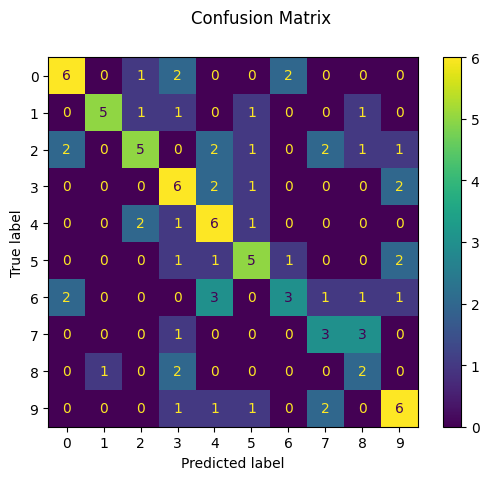

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: Logistic Regression 32x32

size 32x32

- Hyperparameter: 
1. max_iter=630, multi_class='multinomial', penalty=None, random_state=7, solver='saga' => 0.52

Nếu thêm reduce noise: 
1. max_iter=630, multi_class='multinomial', penalty='l2', random_state=7, solver='newton-cg' => 0.53

penalty: dùng để phạt outliers 
- L1: một số cột sẽ bị giảm coefficient, trong 1 số TH có thể bằng 0
- L2: giảm coefficient đồng đều ở tất cả các cột 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {
                'penalty' : ['l2', None],
                'solver' : ['lbfgs', 'newton-cg', 'saga'],
                'max_iter' : np.logspace(2.8, 3.5, 4).astype(int)
            }

cv = StratifiedShuffleSplit(n_splits=2, test_size=0.25, random_state=42)

grid = GridSearchCV(LogisticRegression(random_state=7, multi_class='multinomial'), param_grid, refit=True, verbose=3, cv=cv) 

grid.fit(scaled_X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END max_iter=630, penalty=l2, solver=lbfgs;, score=0.514 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END max_iter=630, penalty=l2, solver=lbfgs;, score=0.481 total time=   3.8s
[CV 1/2] END max_iter=630, penalty=l2, solver=newton-cg;, score=0.508 total time=   4.0s
[CV 2/2] END max_iter=630, penalty=l2, solver=newton-cg;, score=0.492 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END max_iter=630, penalty=l2, solver=saga;, score=0.508 total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END max_iter=630, penalty=l2, solver=saga;, score=0.464 total time=  18.9s
[CV 1/2] END max_iter=630, penalty=None, solver=lbfgs;, score=0.497 total time=   1.2s
[CV 2/2] END max_iter=630, penalty=None, solver=lbfgs;, score=0.387 total time=   1.2s
[CV 1/2] END max_iter=630, penalty=None, solver=newton-cg;, score=0.486 total time=   1.2s
[CV 2/2] END max_iter=630, penalty=None, solver=newton-cg;, score=0.436 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END max_iter=630, penalty=None, solver=saga;, score=0.514 total time=  22.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END max_iter=630, penalty=None, solver=saga;, score=0.470 total time=  23.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END max_iter=1079, penalty=l2, solver=lbfgs;, score=0.508 total time=  12.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END max_iter=1079, penalty=l2, solver=lbfgs;, score=0.492 total time=   9.3s
[CV 1/2] END max_iter=1079, penalty=l2, solver=newton-cg;, score=0.508 total time=   3.4s
[CV 2/2] END max_iter=1079, penalty=l2, solver=newton-cg;, score=0.492 total time=   3.7s
[CV 1/2] END max_iter=1079, penalty=l2, solver=saga;, score=0.508 total time=  26.0s
[CV 2/2] END max_iter=1079, penalty=l2, solver=saga;, score=0.470 total time=  28.1s
[CV 1/2] END max_iter=1079, penalty=None, solver=lbfgs;, score=0.497 total time=   1.0s
[CV 2/2] END max_iter=1079, penalty=None, solver=lbfgs;, score=0.387 total time=   1.8s
[CV 1/2] END max_iter=1079, penalty=None, solver=newton-cg;, score=0.486 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END max_iter=1079, penalty=None, solver=newton-cg;, score=0.436 total time=   1.3s
[CV 1/2] END max_iter=1079, penalty=None, solver=saga;, score=0.503 total time=  31.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END max_iter=1079, penalty=None, solver=saga;, score=0.470 total time=  32.5s
[CV 1/2] END max_iter=1847, penalty=l2, solver=lbfgs;, score=0.508 total time=  12.0s
[CV 2/2] END max_iter=1847, penalty=l2, solver=lbfgs;, score=0.492 total time=  11.9s
[CV 1/2] END max_iter=1847, penalty=l2, solver=newton-cg;, score=0.508 total time=   3.2s
[CV 2/2] END max_iter=1847, penalty=l2, solver=newton-cg;, score=0.492 total time=   3.9s
[CV 1/2] END max_iter=1847, penalty=l2, solver=saga;, score=0.508 total time=  31.0s
[CV 2/2] END max_iter=1847, penalty=l2, solver=saga;, score=0.470 total time=  28.5s
[CV 1/2] END max_iter=1847, penalty=None, solver=lbfgs;, score=0.497 total time=   1.2s
[CV 2/2] END max_iter=1847, penalty=None, solver=lbfgs;, score=0.387 total time=   1.3s
[CV 1/2] END max_iter=1847, penalty=None, solver=newton-cg;, score=0.486 total time=   1.3s
[CV 2/2] END max_iter=1847, penalty=None, solver=newton-cg;, score=0.436 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END max_iter=1847, penalty=None, solver=saga;, score=0.486 total time=  55.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END max_iter=1847, penalty=None, solver=saga;, score=0.453 total time=  54.8s
[CV 1/2] END max_iter=3162, penalty=l2, solver=lbfgs;, score=0.508 total time=  11.9s
[CV 2/2] END max_iter=3162, penalty=l2, solver=lbfgs;, score=0.492 total time=  12.2s
[CV 1/2] END max_iter=3162, penalty=l2, solver=newton-cg;, score=0.508 total time=   4.2s
[CV 2/2] END max_iter=3162, penalty=l2, solver=newton-cg;, score=0.492 total time=   2.9s
[CV 1/2] END max_iter=3162, penalty=l2, solver=saga;, score=0.508 total time=  25.3s
[CV 2/2] END max_iter=3162, penalty=l2, solver=saga;, score=0.470 total time=  34.3s
[CV 1/2] END max_iter=3162, penalty=None, solver=lbfgs;, score=0.497 total time=   2.4s
[CV 2/2] END max_iter=3162, penalty=None, solver=lbfgs;, score=0.387 total time=   2.7s
[CV 1/2] END max_iter=3162, penalty=None, solver=newton-cg;, score=0.486 total time=   3.8s
[CV 2/2] END max_iter=3162, penalty=None, solver=newton-cg;, score=0.436 total time=   2.4s
[CV 1/2] END max_iter=3162, pen

In [ ]:
scaled_X_traindev = X_traindev / 255.
scaled_X_test = X_test / 255.

In [ ]:
clf_lr = LogisticRegression(max_iter=630, multi_class='multinomial', penalty='l2', random_state=7, solver='newton-cg')
clf_lr.fit(X_train / 255., y_train)

LogisticRegression(max_iter=630, multi_class='multinomial', random_state=7,
                   solver='newton-cg')

#### Evaluation

In [ ]:
y_preds = clf_lr.predict(scaled_X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_lr}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
)  

Classification report for classifier LogisticRegression(max_iter=630, multi_class='multinomial', random_state=7,
                   solver='newton-cg'):
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.71      0.56      0.63         9
           2       0.62      0.36      0.45        14
           3       0.33      0.55      0.41        11
           4       0.60      0.60      0.60        10
           5       0.67      0.40      0.50        10
           6       0.56      0.45      0.50        11
           7       0.38      0.71      0.50         7
           8       0.40      0.40      0.40         5
           9       0.54      0.64      0.58        11

    accuracy                           0.53        99
   macro avg       0.55      0.53      0.52        99
weighted avg       0.57      0.53      0.53        99




Confusion matrix:
[[5 0 0 1 0 1 3 0 1 0]
 [0 5 2 0 0 0 0 0 0 2]
 [0 1 6 0 3 2 0 0 1 1]
 [2 0 0 6 0 0 0 1 1 1]
 [0 4 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 3 3 0 2 2]
 [0 1 3 0 1 1 5 0 0 0]
 [0 0 1 0 1 0 0 4 1 0]
 [0 0 0 3 0 0 0 0 2 0]
 [0 1 0 2 0 0 1 0 0 7]]


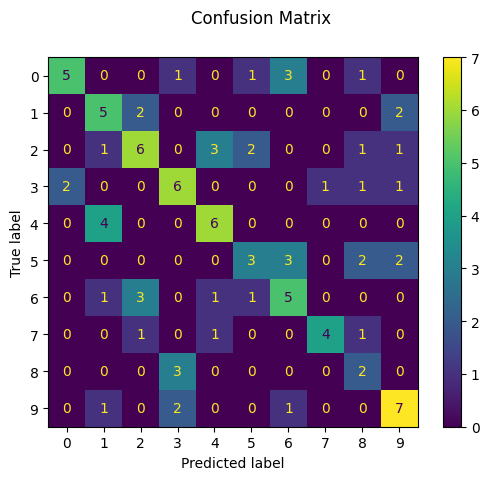

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: K-Nearest Neighbors (Paig's research)
size 12x12


*   Hyperparameter: algorithm = 'auto', leaf_size = 3, n_neighbors = 3, p = 2, weights = 'distance'



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {  'n_neighbors': np.arange(3, 20, 2),
                'weights': ['uniform', 'distance'],
                'p': [1, 2],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': np.arange(3, 40, 3),
              }

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=1, cv=cv) 

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 1872 candidates, totalling 9360 fits
The best parameters are {'algorithm': 'auto', 'leaf_size': 3, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'} with a score of 0.44


In [ ]:
clf_knn = KNeighborsClassifier(algorithm = 'auto', leaf_size = 3, n_neighbors = 3, p = 2, weights = 'distance')
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=3, n_neighbors=3, weights='distance')

In [ ]:
y_preds = clf_knn.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_knn}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
)  

Classification report for classifier KNeighborsClassifier(leaf_size=3, n_neighbors=3, weights='distance'):
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           1       0.43      0.67      0.52         9
           2       0.83      0.36      0.50        14
           3       0.50      0.36      0.42        11
           4       0.67      0.60      0.63        10
           5       0.50      0.60      0.55        10
           6       0.50      0.45      0.48        11
           7       0.50      0.71      0.59         7
           8       0.12      0.20      0.15         5
           9       0.58      0.64      0.61        11

    accuracy                           0.51        99
   macro avg       0.51      0.50      0.49        99
weighted avg       0.55      0.51      0.51        99




Confusion matrix:
[[5 0 0 0 0 1 3 0 2 0]
 [0 6 0 0 1 0 0 1 0 1]
 [2 1 5 0 1 1 0 1 1 2]
 [1 2 0 4 1 0 1 2 0 0]
 [1 2 1 0 6 0 0 0 0 0]
 [0 2 0 0 0 6 0 0 2 0]
 [1 0 0 0 0 2 5 0 1 2]
 [0 0 0 0 0 1 0 5 1 0]
 [0 0 0 3 0 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 7]]


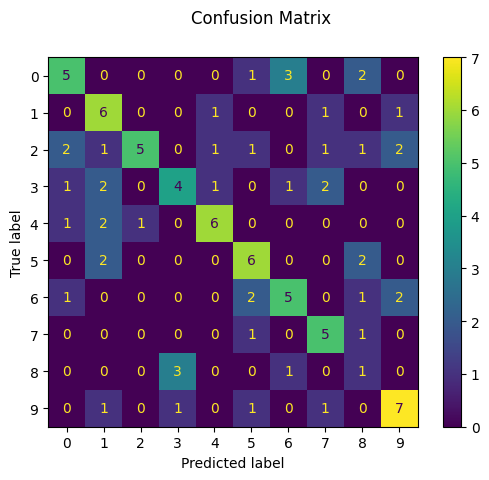

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: K-Nearest Neighbors (Paig's research)
size 32x32


*   Hyperparameter: algorithm = 'auto', leaf_size = 3, n_neighbors = 3, p = 2, weights = 'distance' => 0.37

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {  'n_neighbors': np.arange(3, 30, 2),
                'weights': ['uniform', 'distance'],
                'p': [1, 2],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': np.arange(3, 40, 3),
              }

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=1, cv=cv) 

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 2912 candidates, totalling 14560 fits
The best parameters are {'algorithm': 'auto', 'leaf_size': 3, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'} with a score of 0.37


In [ ]:
clf_knn = KNeighborsClassifier(algorithm = 'auto', leaf_size = 3, n_neighbors = 3, p = 2, weights = 'distance')
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=3, n_neighbors=3, weights='distance')

In [ ]:
y_preds = clf_knn.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_knn}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
) 

Classification report for classifier KNeighborsClassifier(leaf_size=3, n_neighbors=3, weights='distance'):
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.26      0.67      0.38         9
           2       1.00      0.36      0.53        14
           3       0.19      0.27      0.22        11
           4       0.42      0.50      0.45        10
           5       0.44      0.40      0.42        10
           6       0.60      0.27      0.37        11
           7       0.43      0.43      0.43         7
           8       0.00      0.00      0.00         5
           9       0.78      0.64      0.70        11

    accuracy                           0.42        99
   macro avg       0.48      0.41      0.41        99
weighted avg       0.53      0.42      0.44        99




Confusion matrix:
[[5 0 1 1 0 0 0 1 3 0]
 [1 5 0 0 1 0 0 2 0 0]
 [1 4 6 0 2 0 0 1 0 0]
 [1 4 0 3 1 1 0 0 0 1]
 [0 1 0 2 6 0 1 0 0 0]
 [1 1 0 1 0 2 2 0 0 3]
 [0 1 1 0 1 0 5 1 0 2]
 [0 2 1 1 0 0 0 2 0 1]
 [0 0 0 3 0 2 0 0 0 0]
 [2 1 1 2 0 0 1 1 0 3]]


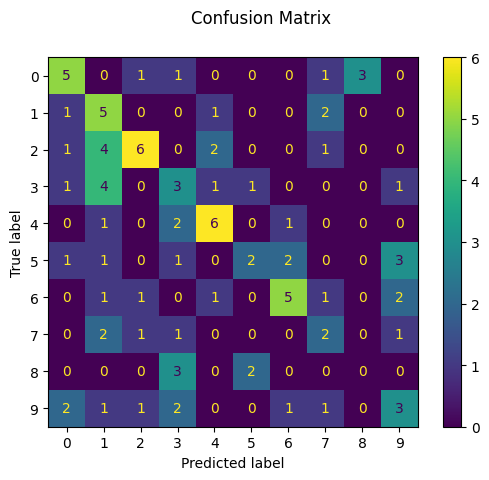

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: Gaussian Naive Bayes (Paig's research)
size 24x24

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_nbg = GaussianNB()
clf_nbg.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_preds = clf_nbg.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_nbg}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
) 

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.29      0.18      0.22        11
           1       0.18      0.22      0.20         9
           2       0.00      0.00      0.00        14
           3       0.17      0.09      0.12        11
           4       0.16      0.60      0.25        10
           5       0.00      0.00      0.00        10
           6       0.16      0.27      0.20        11
           7       0.00      0.00      0.00         7
           8       0.17      0.20      0.18         5
           9       0.12      0.09      0.11        11

    accuracy                           0.16        99
   macro avg       0.12      0.17      0.13        99
weighted avg       0.12      0.16      0.12        99




Confusion matrix:
[[2 5 0 0 3 0 0 0 0 1]
 [0 2 1 0 3 0 2 1 0 0]
 [1 1 0 1 4 1 4 0 0 2]
 [1 0 0 1 5 0 2 0 2 0]
 [1 0 0 0 6 0 2 0 0 1]
 [0 1 0 2 2 0 5 0 0 0]
 [2 0 0 1 1 1 3 0 1 2]
 [0 2 0 0 3 0 0 0 1 1]
 [0 0 0 1 3 0 0 0 1 0]
 [0 0 0 0 8 0 1 0 1 1]]


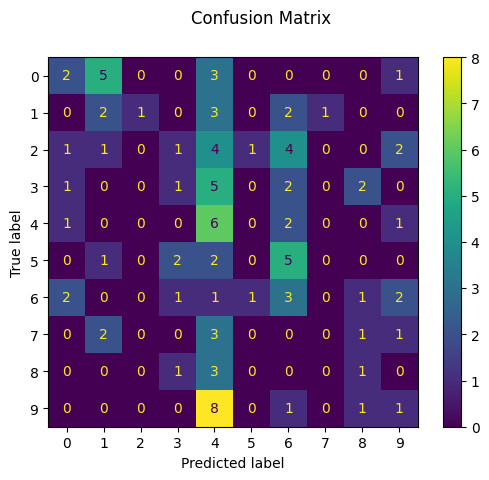

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: Gaussian Naive Bayes (Paig's research)
size 32x32

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_nbg = GaussianNB()
clf_nbg.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_preds = clf_nbg.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_nbg}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
) 

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.12      0.09      0.11        11
           1       0.33      0.33      0.33         9
           2       1.00      0.21      0.35        14
           3       0.75      0.27      0.40        11
           4       0.50      0.30      0.37        10
           5       0.09      0.30      0.14        10
           6       0.00      0.00      0.00        11
           7       0.13      0.29      0.18         7
           8       0.00      0.00      0.00         5
           9       0.12      0.18      0.15        11

    accuracy                           0.20        99
   macro avg       0.31      0.20      0.20        99
weighted avg       0.35      0.20      0.22        99




Confusion matrix:
[[1 0 0 0 0 6 1 1 0 2]
 [2 3 0 0 1 0 0 2 0 1]
 [0 0 3 0 0 6 0 4 0 1]
 [1 1 0 3 1 3 0 2 0 0]
 [1 3 0 0 3 1 0 1 1 0]
 [1 2 0 0 1 3 0 0 1 2]
 [1 0 0 1 0 2 0 2 1 4]
 [0 0 0 0 0 4 0 2 0 1]
 [0 0 0 0 0 2 0 0 0 3]
 [1 0 0 0 0 7 0 1 0 2]]


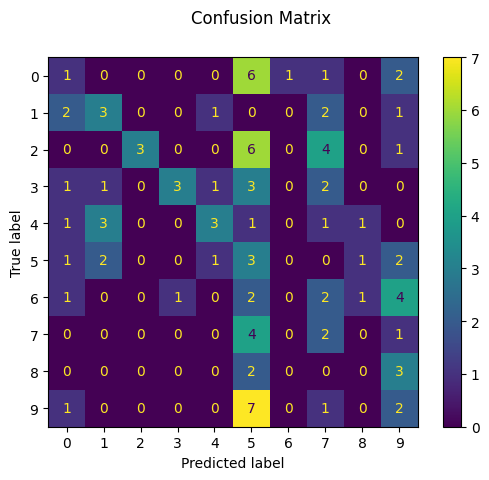

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: Multinomial Naive Bayes (Paig's research)
size 12x12
*   Hyperparameter: force_alpha = True

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {  'force_alpha': [True, False],
              }

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

grid = GridSearchCV(MultinomialNB(), param_grid, refit=True, verbose=1, cv=cv) 

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
The best parameters are {'force_alpha': True} with a score of 0.40


In [ ]:
clf_nbm = MultinomialNB(force_alpha = True)
clf_nbm.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

In [ ]:
y_preds = clf_nbm.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_nbm}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
) 

Classification report for classifier MultinomialNB(force_alpha=True):
              precision    recall  f1-score   support

           0       0.38      0.27      0.32        11
           1       0.43      0.67      0.52         9
           2       0.60      0.21      0.32        14
           3       0.29      0.36      0.32        11
           4       0.43      0.60      0.50        10
           5       0.24      0.40      0.30        10
           6       0.50      0.27      0.35        11
           7       0.36      0.57      0.44         7
           8       1.00      0.20      0.33         5
           9       0.56      0.45      0.50        11

    accuracy                           0.39        99
   macro avg       0.48      0.40      0.39        99
weighted avg       0.46      0.39      0.39        99




Confusion matrix:
[[3 0 0 4 0 2 1 1 0 0]
 [0 6 1 0 0 0 0 0 0 2]
 [0 1 3 2 2 2 1 3 0 0]
 [0 2 0 4 1 3 0 1 0 0]
 [1 2 0 0 6 0 0 1 0 0]
 [1 0 0 1 2 4 1 0 0 1]
 [3 0 0 1 3 1 3 0 0 0]
 [0 1 1 0 0 1 0 4 0 0]
 [0 1 0 1 0 0 0 1 1 1]
 [0 1 0 1 0 4 0 0 0 5]]


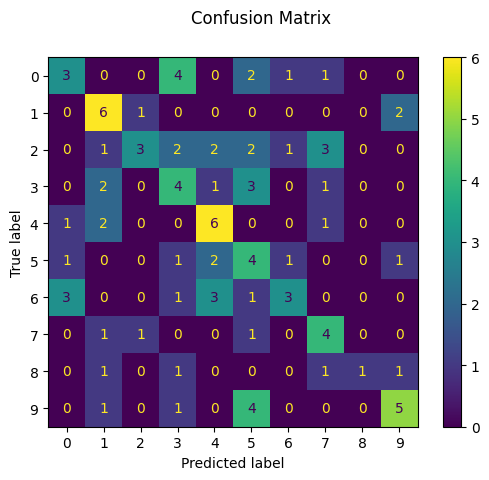

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: Multinomial Naive Bayes 
size 32x32
*   Hyperparameter: force_alpha = True

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {  'force_alpha': [True, False],
              }

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

grid = GridSearchCV(MultinomialNB(), param_grid, refit=True, verbose=1, cv=cv) 

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
The best parameters are {'force_alpha': True} with a score of 0.40


In [ ]:
clf_nbm = MultinomialNB(force_alpha = True)
clf_nbm.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

In [ ]:
y_preds = clf_nbm.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_nbm}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
) 

Classification report for classifier MultinomialNB(force_alpha=True):
              precision    recall  f1-score   support

           0       0.43      0.27      0.33        11
           1       0.46      0.67      0.55         9
           2       0.60      0.21      0.32        14
           3       0.33      0.45      0.38        11
           4       0.43      0.60      0.50        10
           5       0.24      0.40      0.30        10
           6       0.43      0.27      0.33        11
           7       0.33      0.57      0.42         7
           8       1.00      0.20      0.33         5
           9       0.62      0.45      0.53        11

    accuracy                           0.40        99
   macro avg       0.49      0.41      0.40        99
weighted avg       0.47      0.40      0.40        99




Confusion matrix:
[[3 0 0 4 0 3 1 0 0 0]
 [0 6 1 0 0 0 0 0 0 2]
 [0 1 3 1 2 2 1 4 0 0]
 [0 1 0 5 1 2 0 2 0 0]
 [1 2 0 0 6 0 0 1 0 0]
 [0 1 0 2 1 4 1 0 0 1]
 [3 0 0 1 3 1 3 0 0 0]
 [0 1 1 0 0 1 0 4 0 0]
 [0 1 0 1 0 0 1 1 1 0]
 [0 0 0 1 1 4 0 0 0 5]]


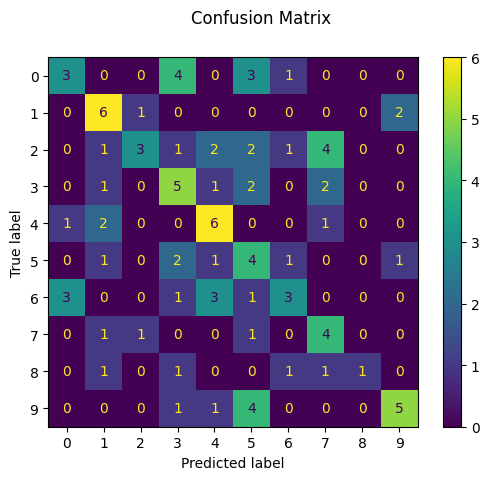

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: Gradient Boosting (Paig's research)
size 12x12
*   Hyperparameter: criterion = 'friedman_mse', learning_rate = 0.07, max_features = 'sqrt', min_samples_split = 3, n_estimators = 100, random_state = 10


Thêm reduce noise => accuracy : 0.66

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {  'learning_rate': np.linspace(0.01, 0.10, num = 10),
                'n_estimators': np.arange(10, 101, 10),
                'criterion': ['friedman_mse', 'squared_error'],
                'min_samples_split': np.arange(2, 5),
                'max_features': ['sqrt', 'log2']
              }

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

grid = GridSearchCV(GradientBoostingClassifier(random_state=10), param_grid, refit=True, verbose=1, cv=cv) 

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
The best parameters are {'criterion': 'friedman_mse', 'learning_rate': 0.07, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 100} with a score of 0.47


In [ ]:
clf_gb = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.07, max_features = 'sqrt', min_samples_split = 3, n_estimators = 100, random_state = 10)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.07, max_features='sqrt',
                           min_samples_split=3, random_state=10)

In [ ]:
y_preds = clf_gb.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_gb}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
) 

Classification report for classifier GradientBoostingClassifier(learning_rate=0.07, max_features='sqrt',
                           min_samples_split=3, random_state=10):
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.50      0.56      0.53         9
           2       0.71      0.36      0.48        14
           3       0.53      0.73      0.62        11
           4       0.86      0.60      0.71        10
           5       0.50      0.60      0.55        10
           6       0.78      0.64      0.70        11
           7       0.86      0.86      0.86         7
           8       0.57      0.80      0.67         5
           9       0.73      0.73      0.73        11

    accuracy                           0.66        99
   macro avg       0.68      0.68      0.66        99
weighted avg       0.68      0.66      0.65        99




Confusion matrix:
[[10  0  0  1  0  0  0  0  0  0]
 [ 0  5  0  1  0  1  0  0  1  1]
 [ 1  1  5  3  0  2  1  1  0  0]
 [ 1  1  0  8  0  1  0  0  0  0]
 [ 0  1  0  1  6  1  0  0  1  0]
 [ 0  1  0  1  0  6  1  0  0  1]
 [ 0  1  1  0  1  0  7  0  1  0]
 [ 0  0  1  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  4  1]
 [ 2  0  0  0  0  1  0  0  0  8]]


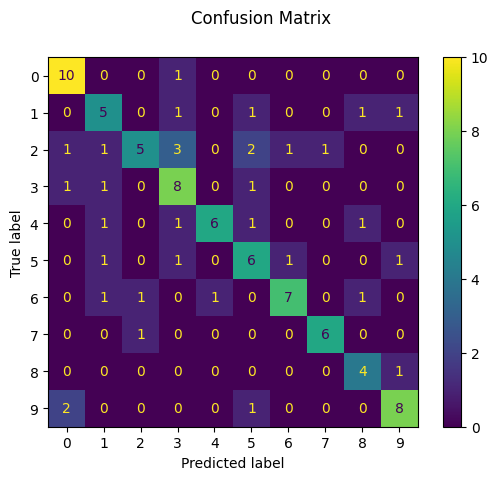

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: Gradient Boosting 
size 32x32
*   Hyperparameter: criterion = 'friedman_mse', learning_rate = 0.07, max_features = 'sqrt', min_samples_split = 3, n_estimators = 100, random_state = 10



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {  'learning_rate': np.linspace(0.01, 0.10, num = 10),
                'n_estimators': np.arange(10, 101, 10),
                'criterion': ['friedman_mse', 'squared_error'],
                'min_samples_split': np.arange(2, 5),
                'max_features': ['sqrt', 'log2']
              }

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

grid = GridSearchCV(GradientBoostingClassifier(random_state=10), param_grid, refit=True, verbose=1, cv=cv) 

grid.fit(X_traindev, y_traindev)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
The best parameters are {'criterion': 'friedman_mse', 'learning_rate': 0.07, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 100} with a score of 0.47


In [ ]:
clf_gb = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.07, max_features = 'sqrt', min_samples_split = 3, n_estimators = 100, random_state = 10)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.07, max_features='sqrt',
                           min_samples_split=3, random_state=10)

In [ ]:
y_preds = clf_gb.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_gb}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
) 

Classification report for classifier GradientBoostingClassifier(learning_rate=0.07, max_features='sqrt',
                           min_samples_split=3, random_state=10):
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.55      0.67      0.60         9
           2       0.70      0.50      0.58        14
           3       0.62      0.73      0.67        11
           4       0.78      0.70      0.74        10
           5       0.78      0.70      0.74        10
           6       0.62      0.73      0.67        11
           7       0.80      0.57      0.67         7
           8       0.38      0.60      0.46         5
           9       0.67      0.73      0.70        11

    accuracy                           0.67        99
   macro avg       0.68      0.66      0.66        99
weighted avg       0.69      0.67      0.67        99




Confusion matrix:
[[4 0 0 3 1 2 0 0 1 0]
 [0 5 0 2 0 0 0 1 0 1]
 [0 2 4 2 1 1 1 1 1 1]
 [0 1 0 4 2 0 1 1 1 1]
 [0 2 0 3 5 0 0 0 0 0]
 [0 0 0 1 1 4 1 0 2 1]
 [0 0 2 2 0 1 2 1 1 2]
 [0 0 2 1 0 1 0 2 0 1]
 [0 0 0 3 0 0 0 0 2 0]
 [0 0 1 2 1 2 0 0 1 4]]


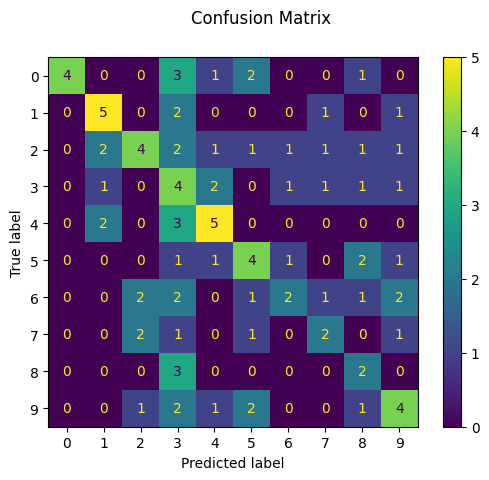

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: XGBoost
size 12x12
- Trước khi reduce noise: 0.37
- Sau khi reduce noise: 0.63 

In [ ]:
import xgboost as xgb

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=3, max_depth=3, learning_rate=0.1, n_estimators=100)
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
y_preds = clf_xgb.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_xgb}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
) 

Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...):
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.50      0.56      0.53         9
           2       0.50      0.29      0.36   

Confusion matrix:
[[9 0 1 0 0 0 1 0 0 0]
 [0 5 0 0 0 0 0 0 1 3]
 [1 1 4 3 0 3 1 1 0 0]
 [0 1 0 6 0 2 0 0 0 2]
 [0 1 0 0 8 0 0 0 1 0]
 [0 0 0 0 0 7 1 0 1 1]
 [0 2 1 0 1 0 6 0 1 0]
 [0 0 1 0 0 0 0 6 0 0]
 [0 0 1 0 0 0 0 0 3 1]
 [2 0 0 0 1 0 0 0 0 8]]


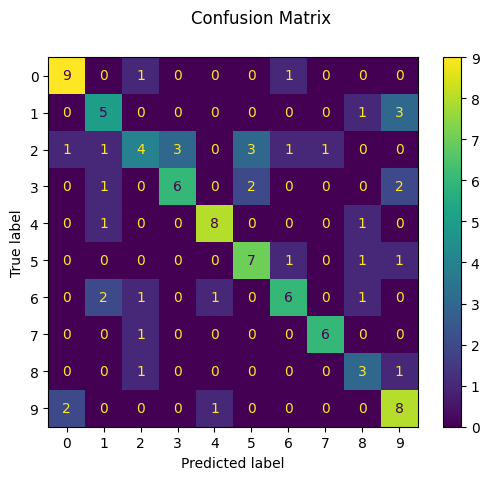

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Model name: XGBoost
size 32x32
- Trước khi reduce noise: 0.36
- Sau khi reduce noise: 0.61

In [ ]:
import xgboost as xgb

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=3, max_depth=3, learning_rate=0.1, n_estimators=100)
clf_xgb.fit(X_traindev, y_traindev)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
print(
    f"Classification report for classifier {clf_xgb}:\n"
    f"{metrics.classification_report(y_dev, clf_xgb.predict(X_dev))}\n"
) 

Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00   

In [ ]:
y_preds = clf_xgb.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {clf_xgb}:\n"
    f"{metrics.classification_report(y_test, y_preds)}\n"
) 

Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...):
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.50      0.56      0.53         9
           2       0.67      0.43      0.52   

Confusion matrix:
[[6 0 1 1 0 0 3 0 0 0]
 [0 5 0 0 0 0 1 1 0 2]
 [0 0 8 1 1 2 0 0 1 1]
 [0 1 0 6 1 2 0 1 0 0]
 [0 2 0 1 5 1 0 0 0 1]
 [0 0 0 2 0 3 1 0 1 3]
 [0 2 0 0 0 1 7 0 1 0]
 [0 1 2 0 0 0 0 2 0 2]
 [0 1 0 2 0 0 0 0 2 0]
 [0 0 0 2 1 0 0 0 0 8]]


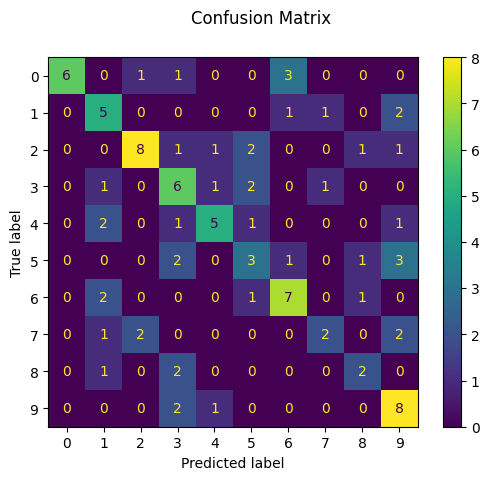

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Conclusion
Trước khi reduce noise: \
- Model có performance tốt nhất hiện tại: RandomForest với accuracy 0.56, đến sau là Logistic Regression với 0.55
- Với ảnh có size càng lớn, accuracy càng tệ, trong khi SVM 12x12 có performance khá tốt với 0.51 thì SVM 28x28 giảm còn 0.43 và với SVM 32x32 thì chỉ còn 0.19.
- Sau khi phân tích lỗi, nhận thấy:
    + Việc resize ảnh bị ảnh hưởng bởi noise từ background, do kỹ thuật resize dùng sử dụng nội suy từ các pixels lân cận nên việc background có nhiều noise sẽ ảnh hưởng lớn tới kết quả resize.
    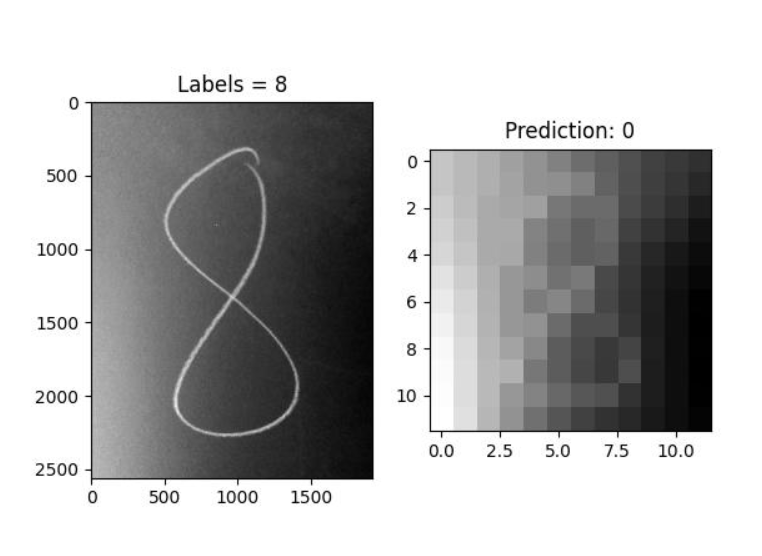
    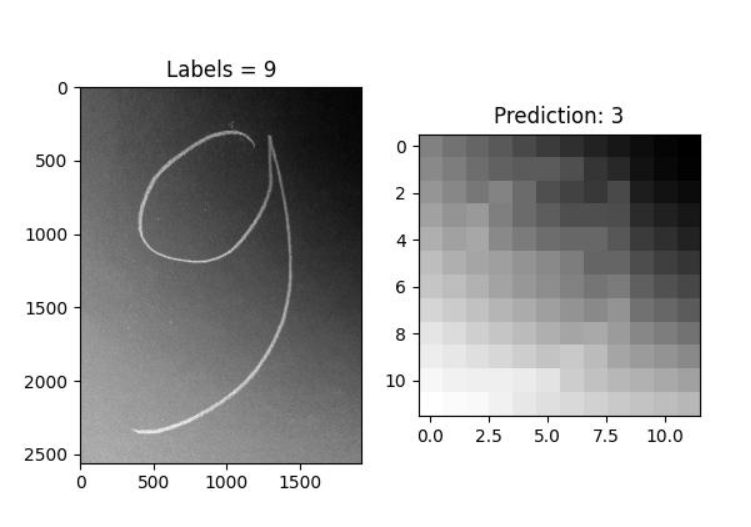
    + Tại sao ảnh 12x12 lại có accuracy cao hơn 28x28 và 32x32? Khi resize càng nhỏ, càng ít thông tin trên ảnh được giữ lại, vô tình sẽ lọc đi kha khá noise ở background. Khi size lớn, ảnh càng có nhiều noise, nên sẽ ảnh hưởng nhiều đến performance.
    + Chất lượng ánh sáng, background mỗi ảnh không lúc nào cũng giống nhau (vì chụp ở các điều kiện khác nhau) 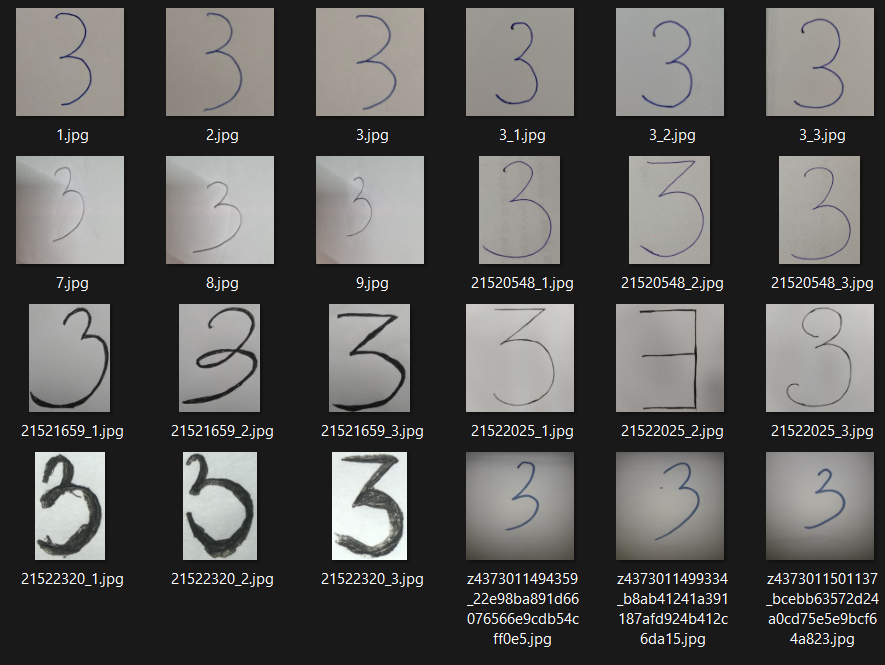 \

=> Vì thế, cần thực hiện kỹ thuật khử noise cho background. Do đó, nhóm sẽ thử kỹ thuật Otsu, nhằm khử noise background

Sau khi thử nghiệm khử noise bằng kỹ thuật Otsu: \
1. Resize 12x12
    - Sau khi reduce noise, có thể thấy accuracy tăng lên khá nhiều ở các model Gradient Boosting (0.37 -> 0.66), XGBoost (0.36 -> 0.63), Random Forest (0.56 -> 0.64), SVM (0.51 -> 0.61), KNN (từ 0.36 -> 0.51), đặc biệt là Gradient Boosting và XGBoost tăng lên gần gấp đôi từ khoảng 0.4 lên gần 0.65
    - Tuy nhiên accuracy của Logistic Regression giảm từ 0.55 xuống còn 0.47, Gaussian Naive Bayes giảm từ 0.19 -> 0.16

2. Resize 28x28

3. Resize 32x32
    - Trước khi reduce noise, performance của SVM chỉ có 0.19, nhưng sau khi được reduce noise, performance đã lên tận 0.6. 
    - Performance của KNN 32x32 tăng nhẹ từ 0.37 lên 0.42 sau khi được reduce noise

    

Có thể thấy: 
- Việc khử noise trên input đã mang lại hiệu quả cao, bằng chứng là performance trên ảnh size lớn hơn sau khi khử noise tăng lên đáng kể 


|Model / size|Trước khi khử noise|Sau khi khử noise|
|:-:|:-:|:-:|
|SVM / 12x12| 0.51 | 0.61 |\hline
|SVM / 28x28| 0.43 |  |
|SVM / 32x32| 0.19 | 0.6 |
|kNN / 12x12| 0.36 | 0.51 |
|kNN / 32x32| 0.37 | 0.42 |
|Random Forest / 12x12| 0.56 | 0.64 |
|Gradient Boosting / 12x12| 0.37 | 0.66 |
|Gradient Boosting / 32x32| 0.36 | 0.61 |
|XGBoost / 12x12| 0.36 | 0.63 |
|XGBoost / 32x32| 0.39 | 0.53 |
|LogReg / 12x12| 0.55 | 0.49 |
|LogReg / 32x32| 0.52 | 0.53 |
|Multinomial Naive Bayes / 12x12| 0.4 | 0.39 |
|Multinomial Naive Bayes / 32x32| 0.41 | 0.40 |
|Gaussian Naive Bayes / 12x12| 0.19 | 0.16 |
|Gaussian Naive Bayes / 32x32| 0.20 | 0.20 |

# Tại sao sao sao?

**Tại sao tất cả các model đều có accuracy thấp (dưới 0.7, thậm chí 1 số còn dưới ngưỡng random)?**

Thứ nhất, do dữ liệu đầu vào là hình ảnh, nên khi ta sửa dụng flatten (chuyển hình ảnh từ dạng ma trận mxn về mảng 1 chiều) để phù hợp cho việc training bằng các model của sklearn thì đặc trưng của hình ảnh sẽ bị mất (ví dụ như đặc trưng nét viết liền kề của các số dưới dạng ma trận sau khi chuyển sang dạng mảng 1 chiều sẽ bị mất đi và thay vào đó chỉ là các ô pixel với các giá trị rời rạc).

Minh họa: Ví dụ ta có 1 ảnh viết tay chữ số 1 (kích thước 5x5) được biểu diễn dưới dạng numpy.array (với 255 là giá trị thể hiện màu trắng, 0 thể hiện màu đen):

Number_1_0:

255 255  0  255 255

255  0   0  255 255

 0  255  0  255 255

255 255  0  255 255

255 255  0  255 255

Sau khi flatten số 1 trên ta có kết quả:

Flattened_1_0: 255 255  0  255 255 255  0   0  255 255  0  255  0  255 255 255 255  0  255 255 255 255  0  255 255

Ta thấy đặc trưng của số 1 là 1 nét liền thẳng màu đen nằm trên nền trắng (các giá trị 0 phải nằm liền kề nhau theo đường dọc hoặc chéo) thì mới minh họa ra được số 1 mà chúng ta thường nhìn thấy. 

Nhưng sau khi flatten thì đặc trưng đó đã mất vì bây giờ mảng của chúng ta là những số 0 xen kẽ với 255, khi minh họa bằng hình ảnh, ta thấy đây không còn giống số 1 nữa mà giống với cây gậy bất thường có những đốm đen trắng nằm xen kẽ nhau hơn, và các đốm đen trắng đó cũng không xuất hiện theo một quy luật nào cả nếu ta “di chuyển” vị trí của số 1 trong ảnh.

Ví dụ:

Number_1_1:

255 255 255 255 0

255 255 255  0  0

255 255  0  255 0 

255 255 255 255 0

255 255 255 255 0

Flattened_1_1:
255 255 255 255 0 255 255 255  0  0 255 255  0  255 0 255 255 255 255 0 255 255 255 255 0

Từ trên ta thấy, chỉ cần “dịch chuyển” số 1 khoảng một chút thôi thì vị trí của các số 0 cũng chẳng tuân theo quy luật nào. Vậy nên đặc trưng đã mất nước mắt em rơi :<

Thứ hai, do bị dữ liệu bị trùng lắp giữa các lớp khá nhiều. Ta thấy sau khi hình ảnh được chuyển về dạng gray_scale và đặc trưng của 1 chữ số đã bị mất đi sau khi bị flatten, giờ đây các “số” khác nhau chỉ còn ý nghĩa là 1 mảng gồm nhiều pixel khác nhau có giá trị từ 0 đến 255. Và nếu mỗi 1 chữ số gồm 12 pixel, và có 50 chữ số đó trong dataset, và có 10 loại chữ số, thì giá trị từ 0 đến 255, tức 256 số còn phải trải đều trên 12x50x10 = 6000 pixel!!! Đó còn chưa kể thực tế bộ dataset nhóm thu thập được còn nhiều hơn nên giá trị của các pixel ở các lớp khác nhau sẽ phải trùng nhau rất nhiều. Để phân biệt được các chữ số với nhau bây giờ thì có lẽ chỉ còn có thể dựa vào 1 đặc trưng mong manh đó là chữ nào có nhiều nét hơn thì sẽ có số pixel gần với giá trị 255 nhiều hơn. Nói mong manh là vì dùng đặc trưng này thì có thể sẽ dễ phân biệt được số có nhiều nét như số 8 với số có ít nét như số 1 nhưng với những số có độ dài nét tương đương nhau như 3 và 8 thì sẽ dễ bị nhầm lẫn.

Thứ ba, do tập dataset không “thống nhất” với nhau. Ví dụ như số 1, các chữ số 1 khác nhau trong dataset có rất nhiều kiểu khác nhau phụ thuộc vào những hoàn cảnh khác nhau. Ví dụ như hoàn cảnh thiết bị chụp, 1 số ảnh số 1 được chụp với 3 mắt của iphone 14 promax nét căng, 1 số được chụp bởi cam web sương mù mờ ảo, 1 số ảnh được chụp bằng cam gì không biết nhưng rung lắc điệu nghệ theo từng nhịp điệu. Với nền ảnh, 1 số được chụp với điều điện thiếu sáng nên nền cũng đen tối huyền ảo, 1 số được chụp với các nền bảy sắc cầu vồng, thậm chí còn chụp với cả ô tập. Với những nghệ nhân sáng tác số, thì con số trông như thế nào còn phụ thuộc vào cảm hứng sáng tác nghệ thuật và sự vung tay đầy ngẫu hứng. Vì vậy nên cùng 1 chữ số trong một bộ dataset sẽ có muôn hình vạn trạng đa dạng sắc thái giống nhau được mỗi cái label và điều này sẽ là thử thách lớn cho các model để có thể cho ra dự đoán với độ chính xác cao.

**Tại sao Naive Bayes có accuracy thấp?**

Link tham khảo: https://www.analyticsvidhya.com/blog/2021/03/introduction-to-naive-bayes-algorithm/#:~:text=The%20Naive%20Bayes%20algorithm%20assumes%20that%20all%20the,in%20other%20words%20all%20the%20features%20are%20unrelated.

Naive Bayes nói chung thường hoạt động tốt nếu dataset thỏa mãn giả thiết mà nó đặt ra: “The Naive Bayes algorithm assumes that all the features are independent of each other or in other words all the features are unrelated.” Túm lại, GNB hoạt động tốt khi các đặc trưng đầu vào là độc lập và phân phối của các lớp là rõ ràng. Nhưng với dataset mnist của chúng ta, các feature không thể nào độc lập vì như đã phân tích giữa các pixel của 1 số (cũng chính là feature của nó) có mối liên hệ mật thiết với nhau. Và phân phối giữa các lớp cũng không rõ ràng mà bị trùng lắp với nhau (cùng có giá trị từ 0 đến 255). Vậy nên nhóm mạnh dạn dự đoán rằng performance của naive bayes không tốt là vì database này không hợp với những tiêu chuẩn mà nó đề ra.

Riêng đối với Gaussian Naive Bayes: “This type of Naive Bayes is used when variables are continuous in nature. It assumes that all the variables have a normal distribution.” Mà bộ dataset của chúng ta không phải dạng liên tục cũng như không có một phân phối cụ thể nào mà được tạo nên bằng ngẫu nhiên và cảm hứng nên performance của model này sẽ không tốt đối với dataset của chúng ta. Đối với Multinomial Naive Bayes: “This is used when the features represent the frequency.”, performance của model này tốt hơn GNB một chút là vì đặc trưng để phân biệt các chữ số cũng có một ít liên quan đến frequency (như ví dụ đã nêu trước đó, số 1 thì có thể sẽ ít nét nhất, tức tần suất xuất hiện của các pixel có giá trị gần với màu đen thường sẽ ít hơn các số khác, ta thấy đặc trưng “độ dài nét” thể hiện được frequency – tần suất xuất hiện).

Vậy nên, do thiên thời địa lợi nhân hòa cộng thêm thực lực nên các model NB đối với dataset này có performance thấp.

**Tại sao tree model tốt hơn các loại model còn lại?**

Link tham khảo: https://www.ibm.com/topics/decision-trees

Các tree model có performance tốt là vì chúng có thể nắm bắt các mối quan hệ phức tạp giữa các feature và với biến mục tiêu. Trái với NB, các tree model không đưa ra bất cứ giả định nào về mối liên hệ giữa các feature và cũng không được sử dụng đặc biệt cho một loại phân phối nào của các feature. Thay vào đó, nó cố gắng biến đổi để “adapt” với dataset của chúng ta. Nó cố gắng để mô hình hóa dataset của chúng ta theo một cách có thể rất cụ thể và tối ưu một cách thoải mái không chịu sự ràng buộc của bất kì công thức toán nào mà bằng mắt thường phân biệt được dựa trên những cá tính độc đáo riêng của dataset (ví dụ như các tiêu chí để phân loại trong cây quyết định có thể bỏ qua các đặc trưng gây nhiễu như nền đa dạng sắc màu, độ rõ của con số, độ đậm của mực viết và tập trung vào các tiêu chí quan trọng như số nét viết, mối quan hệ giữa các pixel để đưa ra mô hình tối ưu) nên sẽ phần nào khắc phục được vẫn đề trùng lắp dữ kiệu ở các lớp khác nhau vì nó có thể ưu tiên sử dụng mối quan hệ giữa các feature để xây dựng mô hình hoặc các đặc điểm khác quan trọng hơn. Do đó, performance của các tree medol có nhỉnh hơn so với các model khác cũng là điều dễ hiểu.

Tuy nhiên, tree model trong sklearn vẫn còn hạn chế. Do để chọn được yếu tố quan trọng để phân loại được đòi hỏi sự quan sát và tư duy tốt, điều này có thể gây khó khăn cho máy. Và tree model như đã nói, có thể xây dựng 1 mô hình cụ thể cho từng bài toán cụ thể nên việc xây dựng 1 tree model chung cho nhiều bài toán khác nhau như trong sklearn có thể sẽ làm giảm phần nào performance của chúng. Và nếu xây dựng model tree không cẩn thận sẽ dễ dẫn đến overfitting.

**Tại sao SVM cũng có performance tốt?**

Link tham khảo: https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/#:~:text=Compared%20to%20newer%20algorithms%20like%20neural%20networks%2C%20they,most%20a%20couple%20of%20thousands%20of%20tagged%20samples.

SVM có thể có hiệu suất tốt trên bộ dữ liệu MNIST vì chúng có thể tìm hiểu các ranh giới quyết định phức tạp có thể phân tách các lớp chữ số viết tay khác nhau.

Các SVM hoạt động bằng cách tìm siêu phẳng phân tách tối đa các loại điểm dữ liệu khác nhau. Trong trường hợp của MNIST, siêu phẳng sẽ là ranh giới quyết định phân tách các chữ số khác nhau dựa trên giá trị pixel của chúng. SVM có thể xử lý cả ranh giới quyết định tuyến tính và phi tuyến tính, điều này rất quan trọng đối với tập dữ liệu như MNIST có thể có mối quan hệ phức tạp, phi tuyến tính giữa các giá trị pixel và biến mục tiêu.
Ngoài ra, các SVM có thể xử lý dữ liệu nhiều chiều, như các giá trị pixel trong hình ảnh MNIST và có thể xử lý cả các tính năng rời rạc và liên tục. Các SVM cũng có thể được chuẩn hóa để ngăn chặn quá khớp, điều này rất quan trọng để đạt được hiệu suất tốt trên dữ liệu thử nghiệm.

Ngoài ra, các SVM có một thuộc tính duy nhất ở chỗ chúng có thể sử dụng các hàm nhân để chuyển đổi dữ liệu đầu vào thành không gian có chiều cao hơn, nơi có thể dễ dàng phân tách các lớp điểm dữ liệu khác nhau. Điều này có thể hữu ích cho các bộ dữ liệu như MNIST, trong đó mối quan hệ giữa các giá trị pixel và biến mục tiêu có thể phức tạp và phi tuyến tính.

**Chọn model nào là tốt nhất?**

Xem xét đến vấn đề mà từ đầu đến giờ ta gặp phải với bài toán mnist, thì có 2 vấn đề lớn nhất đó là phải làm sao để chọn model nào mà khắc phục được vấn đề đặc trưng của ảnh bị mất khi flatten về mảng 1 chiều (chính là mối liên hệ giữa các feature của mảng 1 chiều đó) và sự trùng lắp dữ liệu ở các lớp khác nhau. Ta nhận thấy, các tree model có thể giải quyết được vế đầu tiên, trong khi svm có thể giải quyết được vế sau như nhóm đã phân tích. Vậy túm cái quần lại, sau khi suy nghĩ bằng trí não và lựa chọn bằng con tim, nhóm quyết định chọn cả 2 model này để train dataset mnist này. Vì lựa chọn bằng trí não thì nhóm chọn svm vì thấy được svm hoạt động tốt trên cả 2 cách resize, còn tree model thì 1 tốt 1 sống còn. Còn lựa chọn bằng trái tim thì nhóm chọn tree model vì cảm thấy tree model dễ thương hơn. Trong khi có model thì bắt bẻ dataset phải thế này thế kia để phù hợp với nó, còn tree model lại sẵn lòng dâng hiến hết mình chỉ để làm hài lòng dataset của nhóm. Nên nhóm quyết định gả dataset của mình cho cả 2.

### Error Analysis

In [ ]:
from datetime import datetime

In [ ]:
str(datetime.now())

'2023-06-04 09:09:41.114096'

In [ ]:
os.mkdir('../errors')

In [ ]:
#@title Plot predictions and images
for key in processed_images.keys():
    np_images = np.array(images[key])
    np_p_images = np.array(processed_images[key])
    preds = clf_rf.predict(flatten(np_p_images))
    for image, p_image, prediction in zip( 
                                    np_images[preds != int(key)],
                                    np_p_images[preds != int(key)],
                                    preds[preds != int(key)]
                                ):
        p_image = p_image.reshape(12,12)
        ax, (original, resized) = plt.subplots(nrows=1, ncols=2)
        resized.imshow(p_image, cmap=plt.cm.gray_r, interpolation="nearest")
        resized.set_title(f"Prediction: {prediction}")
        original.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        original.set_title(f"Labels = {key}")
        #plt.text(4, 13, f"Labels = {key}", fontsize=12)
        ax.savefig('../errors/'+str(datetime.now())+'.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')